In [1]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
# sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)

import time
import datetime as dt

warnings.filterwarnings("ignore")

In [4]:
path = "C:/Users/DELL-POJ/Documents/Iykra/SaidML/Master/Cohort Analysis/"

In [5]:
# Import datasets
train = pd.read_excel(path+'Online Retail.xlsx', parse_dates=['InvoiceDate'])

In [6]:
train.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom


In [7]:
# Check the shape of dataset
train.shape

(541909, 8)

In [8]:
train.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [9]:
print(f'Duplicate items in train dataset is {train.duplicated().sum()}')

Duplicate items in train dataset is 5268


In [10]:
# Remove duplicate items 
train = train[~train.duplicated()]

In [11]:
# Define function to find missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
missing_values_table(train)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CustomerID,135037,25.20
Description,1454,0.30


In [14]:
# Create a list of unique InvoiceNo with null CustomerID records
Invoice_list = train[train.CustomerID.isnull()]['InvoiceNo'].tolist()

In [15]:
# Check for the number of records with these InvoicNo
len(train[train.InvoiceNo.isin(Invoice_list)])  

135037

In [16]:
# We don't need records with Null customer id for RFM analysis so let's remove those first
rfm_train = train[train.CustomerID.notnull()].copy()

In [17]:
# Convert remaining Customer Ids to int type
rfm_train.CustomerID = (rfm_train.CustomerID).astype(int)

In [18]:
# Check the count of missing values after removing Null customer id records
missing_values_table(rfm_train) # Train

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [19]:
# Check and remove transactions with cancelled items.
desc_df = rfm_train[~rfm_train.InvoiceNo.str.contains('C', na=False)]

In [20]:
# Let's create a feature with total cost of the transactions
desc_df['Total_cost'] = rfm_train.Quantity * rfm_train.UnitPrice

In [21]:
# Check the oldest and latest date in the dataset.
print(f'Oldest date is - {desc_df.InvoiceDate.min()}\n')
print(f'Latest date is - {desc_df.InvoiceDate.max()}')

Oldest date is - 2010-12-01 08:26:00

Latest date is - 2011-12-09 12:50:00


In [22]:
# Check the top ten countries in the dataset with highest transactions
desc_df.Country.value_counts(normalize=True).head(10).mul(100).round(1).astype(str) + '%'

United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Name: Country, dtype: object

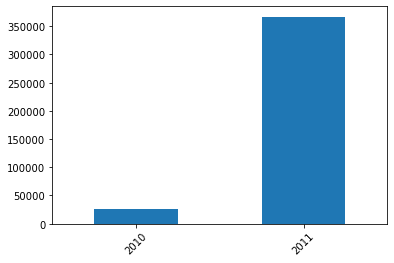

In [23]:
# Count of transactions in different years
desc_df.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45);

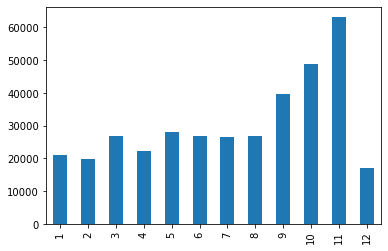

In [24]:
# Count of transactions in different months within 2011 year.
desc_df[desc_df.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar');

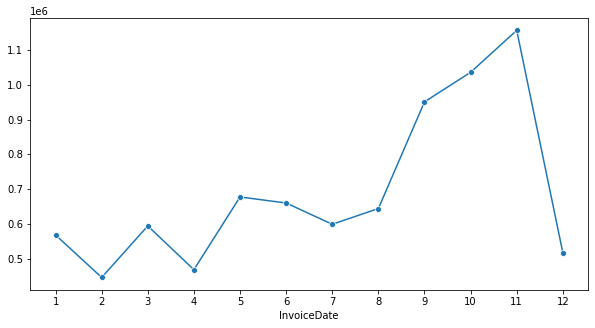

In [25]:
# Let's visualize the top grossing months
monthly_gross = desc_df[desc_df.InvoiceDate.dt.year==2011].groupby(desc_df.InvoiceDate.dt.month).Total_cost.sum()
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o');
plt.xticks(range(1,13))
plt.show();

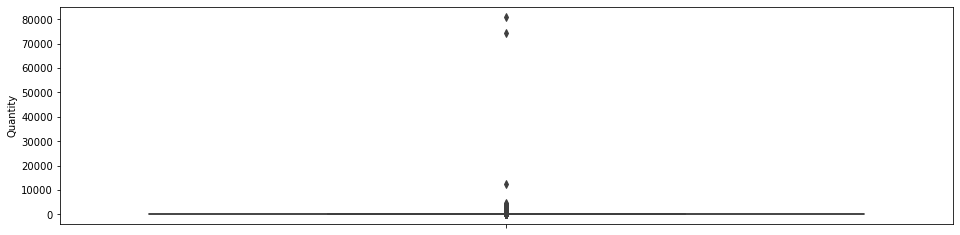

In [26]:
# Boxplot to visualize the Quantity distribution
plt.figure(figsize=(16,4))
sns.boxplot(y='Quantity', data=desc_df, orient='h');

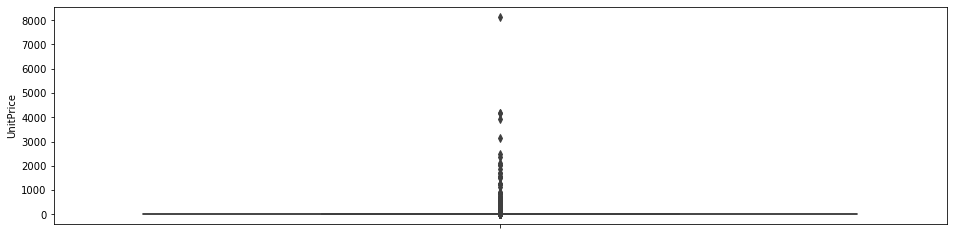

In [27]:
# Let's visualize the Unit price distribution
plt.figure(figsize=(16,4))
sns.boxplot(y='UnitPrice', data=desc_df, orient='h');

In [28]:
desc_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


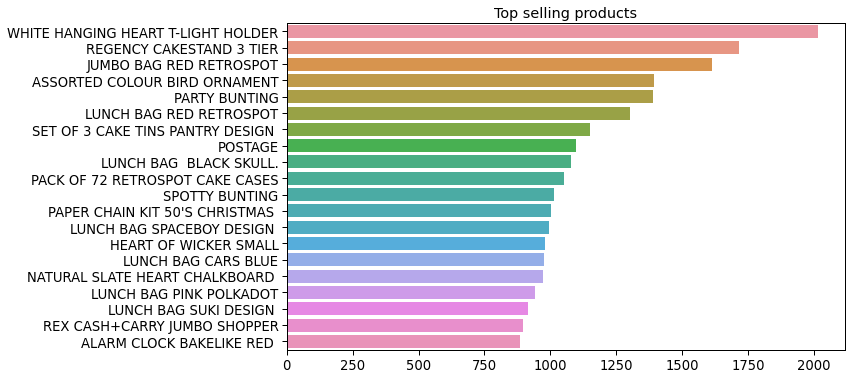

In [29]:
# Let's visualize some top products from the whole range.
top_products = desc_df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();

In [30]:
# Create a copy of rfm_train dataframe for cohort analysis
cohort = rfm_train.copy()

In [31]:
# Define a function that will parse the date
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [32]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [33]:
# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [34]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [35]:
cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1


In [36]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [37]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

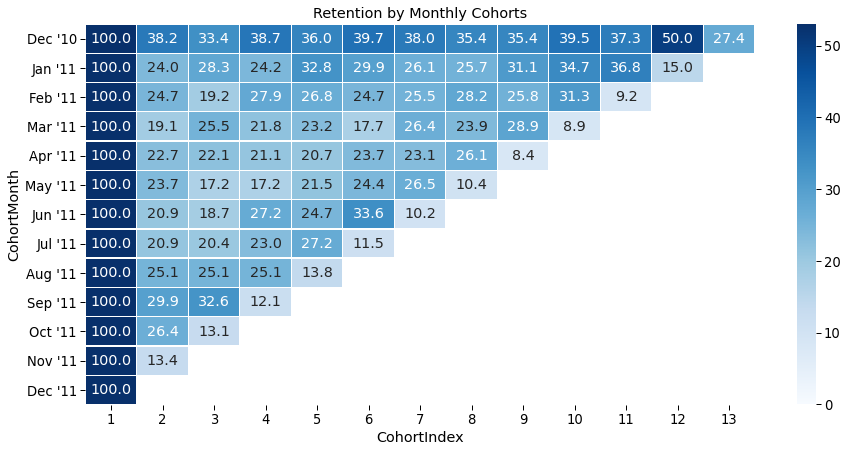

In [38]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,7))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
#             vmax = 0.5,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show();

In [39]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price.round(1)
average_price.index = average_price.index.date

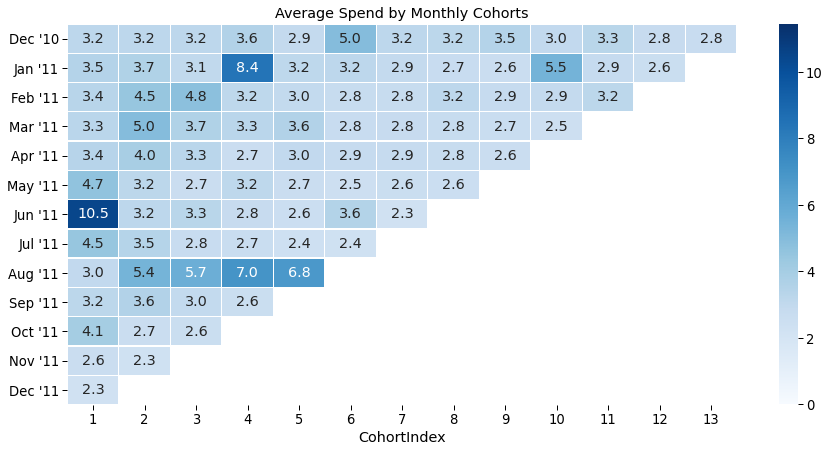

In [40]:
# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Spend by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
#             vmax =20,
            cmap='Blues',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();


In [41]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
# average_quantity.round(1)
# average_quantity.index = average_quantity.index.date

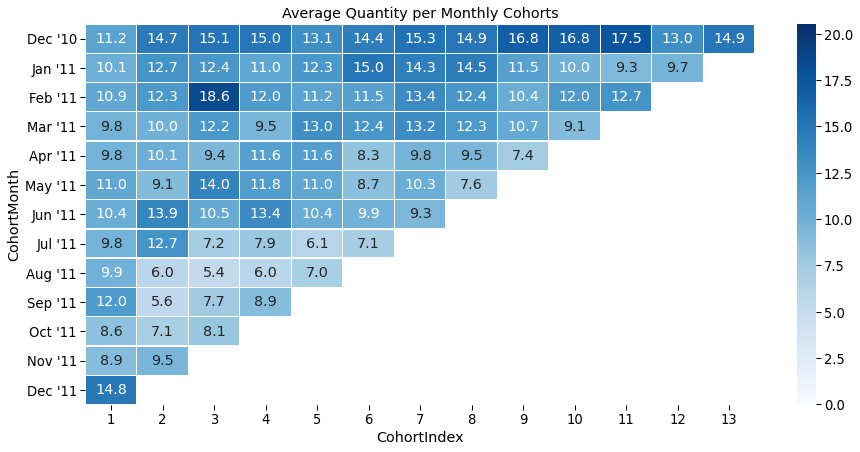

In [42]:
# Initialize plot figure
plt.figure(figsize=(15, 7))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Blues',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
plt.show();

In [43]:
#last date available in our dataset
rfm_train['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [44]:
# Lets set this date as the today's date for further analysis
current_date = dt.date(2011,12,9)

In [45]:
# Lets create a date column for date values only
rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date

In [46]:
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [47]:
# Create a separate column for this date.
recency = recency.assign(Current_Date = current_date)

In [48]:
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)

In [49]:
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346,2011-01-18,2011-12-09,325
1,12347,2011-12-07,2011-12-09,2
2,12348,2011-09-25,2011-12-09,75
3,12349,2011-11-21,2011-12-09,18
4,12350,2011-02-02,2011-12-09,310


In [50]:
# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)

In [51]:
frequency = rfm_train.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})

In [52]:
frequency.head()

,CustomerID,Frequency
0,12346,2
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [53]:
# Create a separate column for Total Cost of Unit purchased
rfm_train['Total_cost'] = rfm_train.Quantity * rfm_train.UnitPrice

In [54]:
monetary = rfm_train.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})

In [55]:
monetary.head()

,CustomerID,Monetary
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [56]:
temp_ = recency.merge(frequency, on='CustomerID')
rfm_table = temp_.merge(monetary, on='CustomerID')

In [57]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,2,0.00
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [58]:
# Fetch the records corresponding to the first customer id in above table
rfm_train[rfm_train.CustomerID == rfm_table.index[0]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase_Date,Total_cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,2011-01-18,77183.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,2011-01-18,-77183.60


In [59]:
# Check if the number difference of days from the purchase date in original record is same as shown in rfm table.
(current_date - rfm_train[rfm_train.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]

True

In [60]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,16.00,1.00,291.79
0.50,50.00,3.00,644.07
0.75,143.00,5.00,1608.34


In [61]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 291.79499999999996,
  0.5: 644.0700000000002,
  0.75: 1608.335}}

In [62]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [63]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [64]:
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [65]:
rfm_segment.head()


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346,325,2,0.00,1,2,1
12347,2,7,4310.00,4,4,4
12348,75,4,1797.24,2,3,4
12349,18,1,1757.55,3,1,4
12350,310,1,334.40,1,1,2


In [66]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346,325,2,0.00,1,2,1,121
12347,2,7,4310.00,4,4,4,444
12348,75,4,1797.24,2,3,4,234
12349,18,1,1757.55,3,1,4,314
12350,310,1,334.40,1,1,2,112


In [67]:
# Reset the index to create a customer_ID column
rfm_segment.reset_index(inplace=True)

In [68]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'Almost Lost':'244',         # Customer's shopping less often now who used to shop a lot
    'Lost Customers':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}


In [69]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [70]:
# Allocate segments to each customer as per the RFM score mapping
rfm_segment['Segment'] = rfm_segment.RFMScore.map(lambda x: dict_segment.get(x))

In [71]:
# Allocate all remaining customers to others segment category
rfm_segment.Segment.fillna('others', inplace=True)

In [72]:
rfm_segment.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
281,12686,371,1,89.14,1,1,1,111,others
2539,15774,68,1,270.80,2,1,1,211,others
2825,16168,10,28,3770.60,4,4,4,444,Best Customers
1900,14918,115,2,1610.15,2,2,4,224,others
3553,17163,21,2,293.10,3,2,2,322,others
4280,18167,3,6,1355.51,4,4,3,443,Recent Customers
1045,13745,151,2,291.54,1,2,1,121,others
2105,15198,92,2,193.64,2,2,1,221,others
2729,16038,7,4,454.33,4,3,2,432,others
1179,13931,85,3,1230.93,2,2,3,223,others


In [73]:
# Best Customers who's recency, frequency as well as monetary attribute is highest.
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1703,14646,1,77,279489.02,4,4,4,444,Best Customers
4233,18102,0,62,256438.49,4,4,4,444,Best Customers
3758,17450,8,55,187322.17,4,4,4,444,Best Customers
1895,14911,1,248,132458.73,4,4,4,444,Best Customers
1345,14156,9,66,113214.59,4,4,4,444,Best Customers


In [74]:
# Biggest spenders
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2794,16126,29,4,6287.77,3,3,4,334,Big Spenders
737,13316,37,5,5570.69,3,3,4,334,Big Spenders
2923,16303,25,4,5305.83,3,3,4,334,Big Spenders
2897,16258,45,5,5203.51,3,3,4,334,Big Spenders
70,12432,42,5,5059.32,3,3,4,334,Big Spenders


In [75]:
# Almost Lost i.e. who's recency value is low
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
464,12939,64,8,11581.80,2,4,4,244,Almost Lost
50,12409,78,7,11056.93,2,4,4,244,Almost Lost
2836,16180,100,10,10217.48,2,4,4,244,Almost Lost
328,12744,51,10,9120.39,2,4,4,244,Almost Lost
3248,16745,86,18,7157.10,2,4,4,244,Almost Lost


In [76]:
# Lost customers that don't needs attention who's recency, frequency as well as monetary values are low
rfm_segment[rfm_segment.RFMScore=='122'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1578,14481,164,2,636.51,1,2,2,122,Lost Cheap Customers
2246,15384,169,3,635.76,1,2,2,122,Lost Cheap Customers
1230,14000,206,2,633.71,1,2,2,122,Lost Cheap Customers
1985,15045,151,3,633.66,1,2,2,122,Lost Cheap Customers
1391,14220,247,2,632.40,1,2,2,122,Lost Cheap Customers


In [77]:
# loyal customers who's purchase frequency is high
rfm_segment[rfm_segment.RFMScore=='344'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
55,12415,24,26,123725.45,3,4,4,344,Loyal Customers
2722,16029,38,76,53168.69,3,4,4,344,Loyal Customers
3014,16422,17,75,33805.69,3,4,4,344,Loyal Customers
458,12931,21,20,33462.81,3,4,4,344,Loyal Customers
1728,14680,25,23,26932.34,3,4,4,344,Loyal Customers


In [78]:
# customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
464,12939,64,8,11581.80,2,4,4,244,Almost Lost
50,12409,78,7,11056.93,2,4,4,244,Almost Lost
2836,16180,100,10,10217.48,2,4,4,244,Almost Lost
328,12744,51,10,9120.39,2,4,4,244,Almost Lost
3248,16745,86,18,7157.10,2,4,4,244,Almost Lost


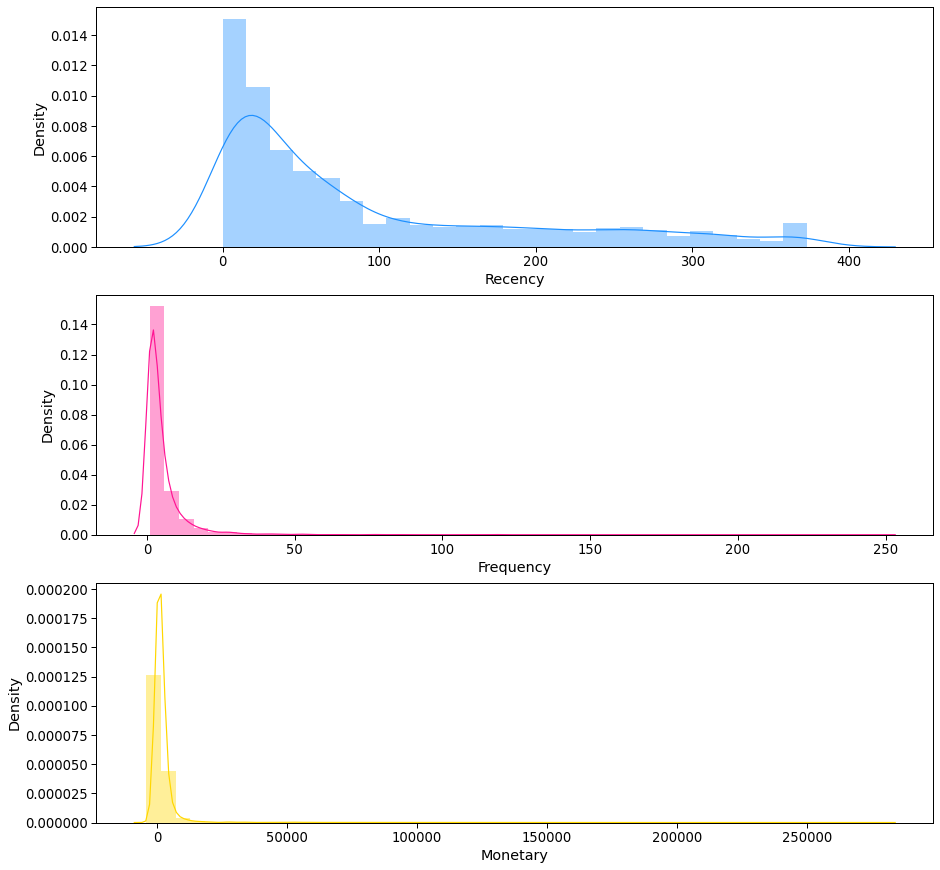

In [79]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

In [80]:
# Let's describe the table to see if there are any negative values
rfm_table.describe()

,Recency,Frequency,Monetary
count,4372.00,4372.00,4372.00
mean,91.58,5.08,1893.53
std,100.77,9.34,8218.70
min,0.00,1.00,-4287.63
25%,16.00,1.00,291.79
50%,50.00,3.00,644.07
75%,143.00,5.00,1608.34
max,373.00,248.00,279489.02


In [81]:
# Create a copy of rfm table
rfm_table_scaled = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1

# Check the summary of new values
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4372.00,4372.00,4372.00
mean,92.58,5.08,6182.16
std,100.77,9.34,8218.70
min,1.00,1.00,1.00
25%,17.00,1.00,4580.43
50%,51.00,3.00,4932.70
75%,144.00,5.00,5896.97
max,374.00,248.00,283777.65


In [82]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

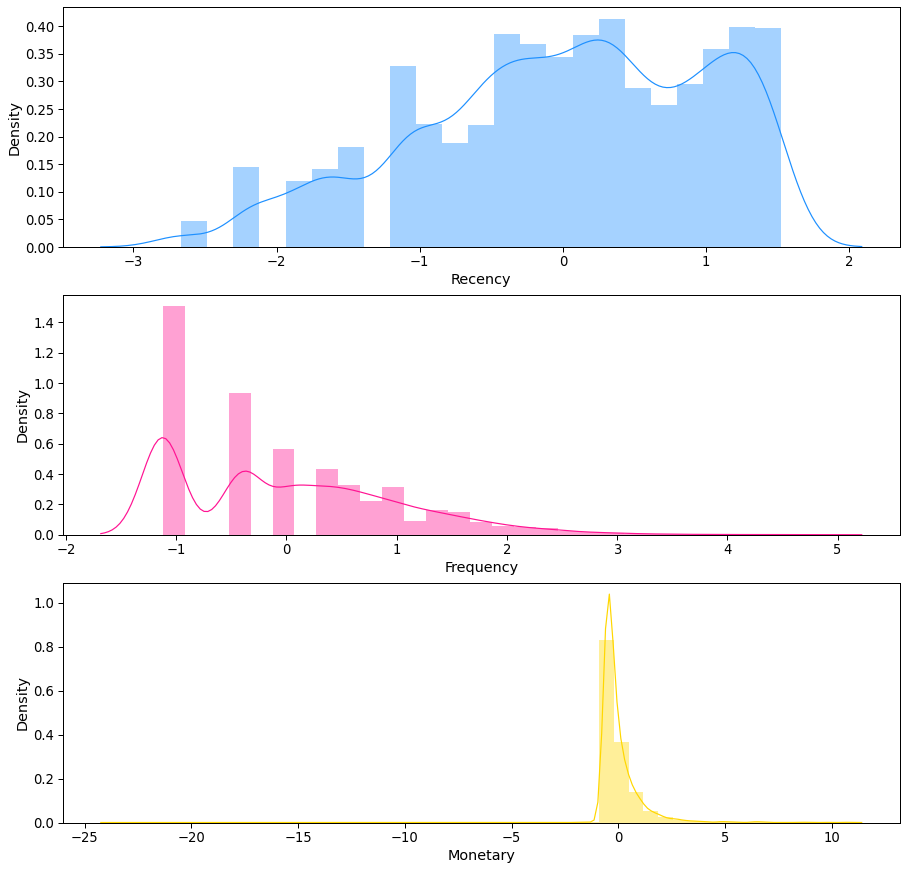

In [83]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

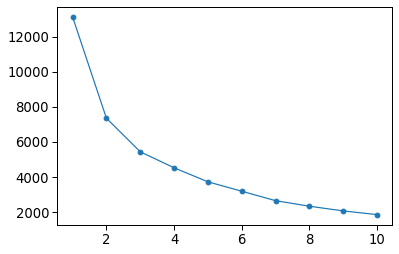

In [84]:
# find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');

Silhouette score for number of cluster(s) 2: 0.4405297656150766
Silhouette score for number of cluster(s) 3: 0.3967504690109654
Silhouette score for number of cluster(s) 4: 0.35046863106007997
Silhouette score for number of cluster(s) 5: 0.36166861264035577
Silhouette score for number of cluster(s) 6: 0.36486216225288387
Silhouette score for number of cluster(s) 7: 0.35445191505198254
Silhouette score for number of cluster(s) 8: 0.33932511699064893
Silhouette score for number of cluster(s) 9: 0.3436531967884225
Silhouette score for number of cluster(s) 10: 0.35333869474160057
Silhouette score for number of cluster(s) 11: 0.3607881642107286


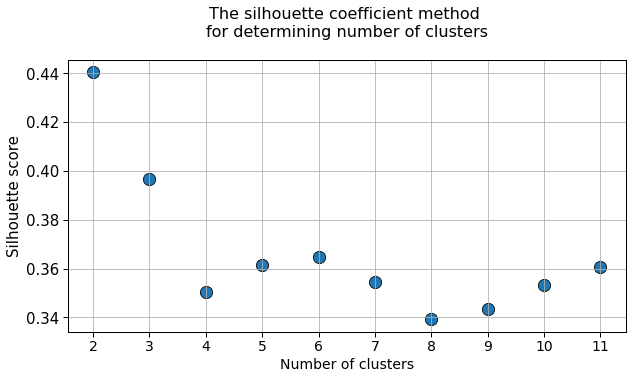

In [85]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [86]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [87]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [88]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4372,)
Shape of RFM segment dataframe is (4372, 9)


In [89]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [90]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

2    1781
0    1595
1     875
3     121
Name: Cluster, dtype: int64

In [91]:
Cluster_table.sample(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1752,14711,10,12,2809.02,4,4,4,444,Best Customers,1
2345,15518,64,13,1890.99,2,4,4,244,Almost Lost,1
2678,15973,235,3,99.77,1,2,1,121,others,2
1500,14377,191,2,617.05,1,2,2,122,Lost Cheap Customers,2
304,12716,3,2,1053.49,4,2,3,423,others,0
1868,14875,9,5,1448.72,4,3,3,433,others,1
2391,15577,151,3,258.88,1,2,1,121,others,2
3627,17268,107,4,763.64,2,3,3,233,others,0
613,13146,26,1,228.91,3,1,1,311,others,0
2690,15987,12,7,1432.77,4,4,3,443,Recent Customers,1


In [92]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
3854,17581,0,31,10716.31,4,4,4,444,Best Customers,3
3704,17381,8,30,20272.43,4,4,4,444,Best Customers,3
3722,17404,4,18,30300.82,4,4,4,444,Best Customers,3
3801,17511,2,46,88125.38,4,4,4,444,Best Customers,3
4225,18092,2,12,9065.76,4,4,4,444,Best Customers,3


In [93]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
877,13508,243,1,110.97,1,1,1,111,others,2
2271,15417,85,1,508.80,2,1,2,212,others,2
3311,16823,227,1,358.38,1,1,2,112,others,2
2434,15636,89,2,724.76,2,2,3,223,others,2
1033,13730,135,2,752.60,2,2,3,223,others,2


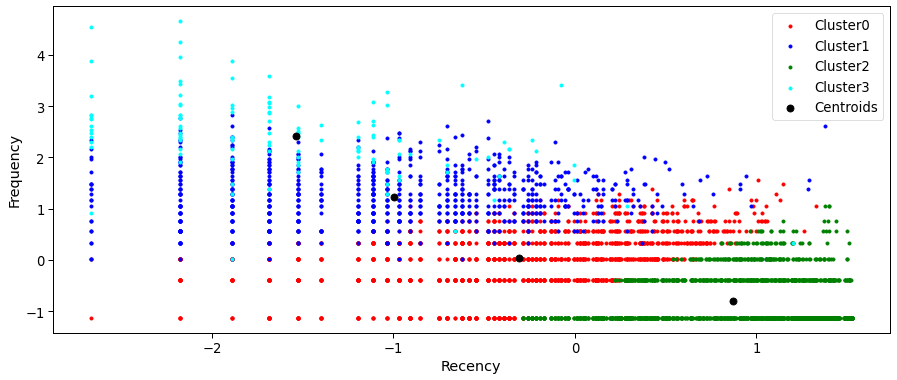

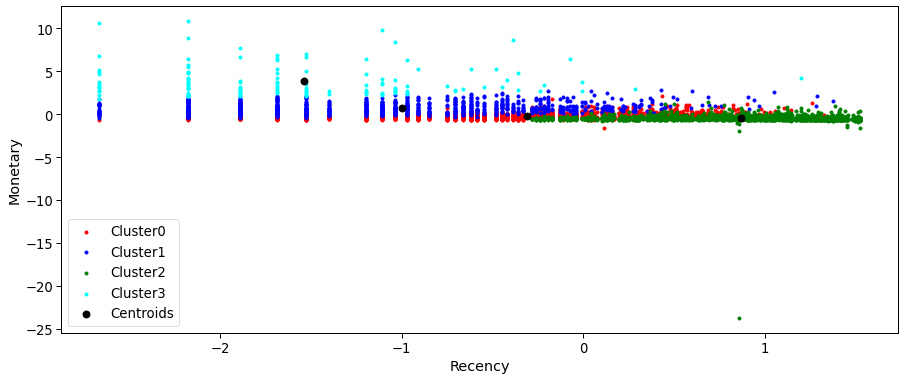

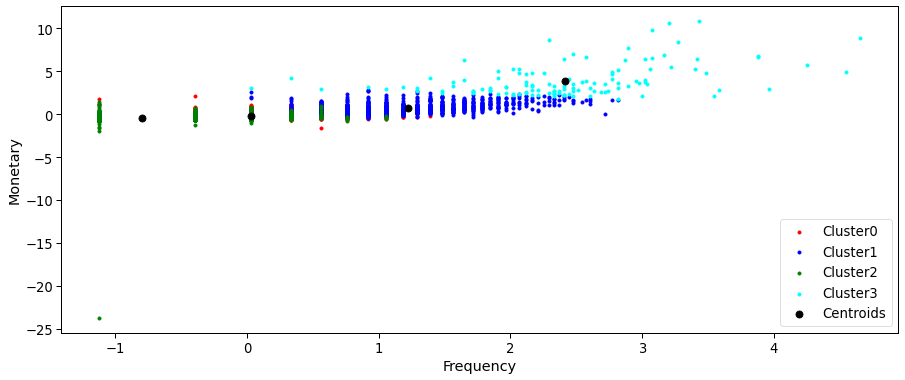

In [94]:
# Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()        
        plt.show();

In [95]:
# Assign Cluster values to each customer in normalized dataframe
normal_df = normal_df.assign(Cluster = cluster_labels)

# Melt normalized dataframe into long form to have all metric in same column
normal_melt = pd.melt(normal_df.reset_index(),
                      id_vars=['CustomerID','Cluster'],
                      value_vars=['Recency', 'Frequency', 'Monetary'],
                      var_name='Metric',
                      value_name='Value')
normal_melt.head()

,CustomerID,Cluster,Metric,Value
0,12346,2,Recency,1.43
1,12347,1,Recency,-1.89
2,12348,0,Recency,0.40
3,12349,0,Recency,-0.58
4,12350,2,Recency,1.40


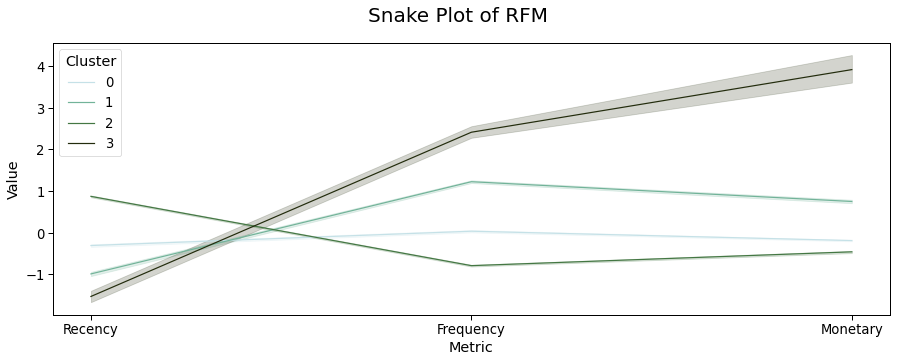

In [96]:
# a snake plot with K-Means
plt.figure(figsize=(15,5))
palette = sns.color_palette("mako_r", 4)
sns.lineplot(x = 'Metric',
             y = 'Value',
             hue = 'Cluster',
             data = normal_melt,
             palette = "ch:4.4,.44")

plt.suptitle("Snake Plot of RFM",fontsize=20)
plt.show();

In [97]:
# Assign Cluster labels to RFM table
rfm_table_cluster = rfm_table.assign(Cluster = cluster_labels)

# Average attributes for each cluster
cluster_avg = rfm_table_cluster.groupby(['Cluster']).mean() 

# Calculate the population average
population_avg = rfm_table.mean()

# Calculate relative importance of attributes by 
relative_imp = cluster_avg / population_avg - 1

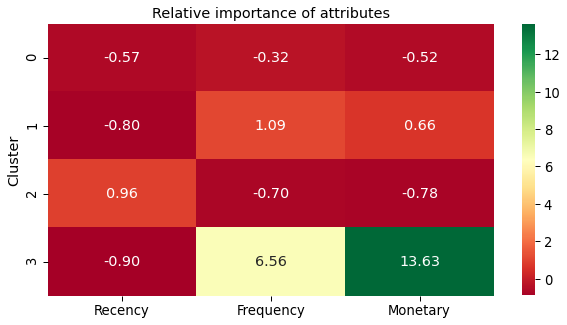

In [98]:
plt.figure(figsize=(10, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show();